In [2]:
import matplotlib.pyplot as plt
import torch
from torchvision.io import read_image
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
import torch.nn as nn
import context
from diffusion_models.models import ForwardDiffusion

In [3]:
img = "/Users/lionelpeer/Pictures/2020/Japan/darktable_exported/DSC_1808.jpg"
img2 = "/Users/lionelpeer/Pictures/2020/Japan/DSC_1390.JPG"
img = read_image(img) / 255
img2 = read_image(img2) / 255
batch = torch.cat([img.unsqueeze(0), img.unsqueeze(0)], dim=0)

In [22]:
transforms.Resize()

torch.Size([2, 3, 4016, 6016])

In [20]:
device = torch.device("mps")

noiser = ForwardDiffusion(timesteps=5000, device=device)

In [24]:
noisies = [noiser.forward(batch[0], i*500).cpu().permute(1,2,0) for i in range(7)]

In [29]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


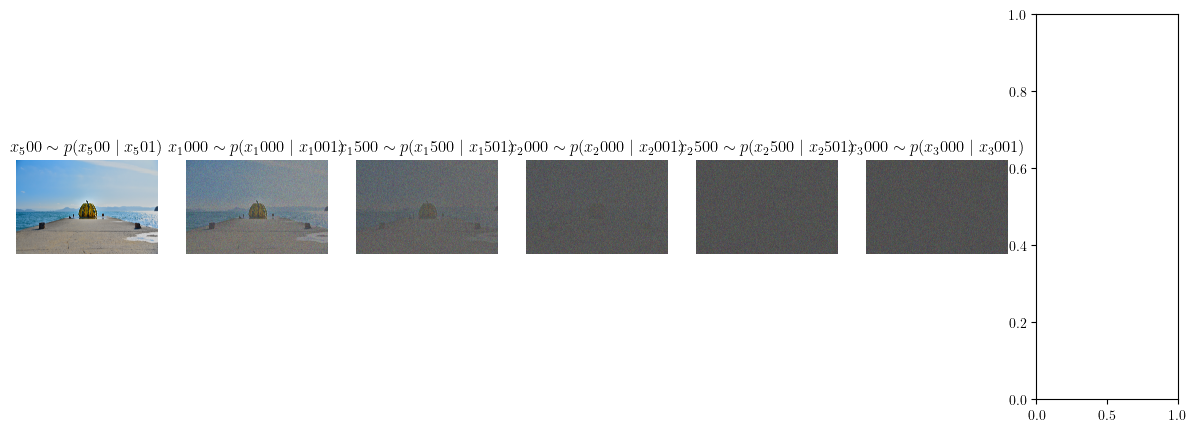

In [38]:
blub = [r"$x_{0} \sim p(x_{0})"]
titles = [
    r"$x_{} \sim p(x_{}\mid x_{})$".format(i, i, i+1) for i in [j*500 for j in range(1, 7)]
]
blub.extend(titles)

In [ ]:
fig, ax = plt.subplots(1,7,figsize=(15,5))
for i, (elem, title) in enumerate(zip(noisies[:-1], titles)):
    ax[i].imshow(elem)
    ax[i].axis("off")
    ax[i].set_title(title)